# Machine Learning: Assignment 4
## Regression methods (max. 10p)

In [7]:
# Write Your information in here
student_name = 'Kristian Pekkanen, Joonas Lahti'
student_id = "AD0462, AC6855"

## Assignment 4.1: Preprocess the data (2 p)
### Topic: Productivity of textile workers

1. Explore and download the data from [https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees#](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees#). Load the data into the DataFrame.

2. Remove background variables from the analyzed data.

3. Decide what to do with the missing values.

4. Normalize the data.

5. Additionally, create a new class variable with a value of 0 if the productivity is less than 0.5 and with a value of 1 if the productivity is above 0.5. Store this in the df variable as column `class`. That will be used in classification assignment (4.3).

In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('garments_worker_productivity.csv')

background_variables = ['date', 'quarter', 'department', 'day', 'team', 'wip']
df = df.drop(columns=background_variables)

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df['class'] = df['actual_productivity'].apply(lambda x: 1 if x > 0.5 else 0)

In [9]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the task.
# Save the DataFrame to the df variable and the training data.
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['targeted_productivity', 'smv', 'over_time', 'incentive', 'idle_time',
       'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'class'],
      dtype='object')
First row by position: targeted_productivity    1.000000
smv                      0.450252
over_time                0.273148
incentive                0.027222
idle_time                0.000000
idle_men                 0.000000
no_of_style_change       0.000000
no_of_workers            0.655172
actual_productivity      0.797332
class                    1.000000
Name: 0, dtype: float64


## Assignment 4.2: Regression using a Linear Regression model (2 p)

1. Split the data into training (67%) and testing data (33%), also saving the class variables as their own vectors (`X_train`, `y_train`, `X_test`, `y_test`). Use random seed `2150`.

Tip: don't put the columns `actual_productivity` or `class` in the input variables (features).

2. Use the [functions](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) from `ensemble` module
of the `scikit-learn` library and create a regression model using a linear regressor. So you try to predict the `actual_productivity` variable.

Use random seed `2100`.

3. Predict the `actual_productivity` of the test dataset. Record the explained variance `exp_var` and
the maximum error `max_err` using the tools in the `metrics` module of the library.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, max_error
from sklearn.model_selection import cross_val_score


X = df.drop(columns=['class', 'actual_productivity'])
y = df['actual_productivity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2150)

model = RandomForestRegressor(random_state=2100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

exp_var = r2_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)
exp_var_2 = cross_val_score(model, X, y, cv=5, scoring="r2").mean()

In [11]:


print(f'Explained variance: {exp_var}')
print(f'Maximum error: {max_err}')

Explained variance: 0.3725471462021691
Maximum error: 0.7208830090034275


In [12]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# Save responses in exp_var and max_err variables.
# print(f'Test length: {len(X_test)}')
# print(f'Train length: {len(X_train)}')
# print(f'Train columns: {X_train.columns}')
# print(f'Train columns length: {len(X_train.columns)}')
# print(f'Predict 5 items: {y_pred[:5]} ... {y_pred[-5:]}')


print(f'Explained variance: {exp_var}')
print(f'Maximum error: {max_err}')
print(f'Explained variance (Weighted): {exp_var_2}')

Explained variance: 0.3725471462021691
Maximum error: 0.7208830090034275
Explained variance (Weighted): 0.36477042670215776


**Explained variance** refers to the variance in the response variable in a model that can be explained by the predictor variable(s) in the model.
The higher the explained variance of a model, the more the model is able to explain the variation in the data.

Calculate and analyze the explained variance for the assignment.

In [13]:
# TODO: Explained variance
exp_var_2 = cross_val_score(model, X, y, cv=5, scoring="r2").mean()
exp_var_weighted = cross_val_score(model, X, y, cv=5, scoring="explained_variance").mean()
print(f'Explained variance (Weighted): {exp_var_2}')
print(f'Explained variance (Weighted): {exp_var_weighted}')

Explained variance (Weighted): 0.36477042670215776
Explained variance (Weighted): 0.3735014103660276


## Assignment 4.3: Classification using Random Forest (2 p)

1. Create training and testing data. Use random seed `2150`. Note that the `class` variable is now predicted.

2. Use the [functions](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) from `ensemble` module
of the `scikit-learn` library and create a classification model using a random forest. Use random seed `2100`. So let's try to predict the class variable `class`.

3. Predict `class` from the test data. Generate the accuracy report `cr` and the confusion matrix `cm` using the tools in the `metrics` module of the library.

In [14]:
# TODO: Write your code in this cell
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop(columns=['class', 'actual_productivity'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2150)

model = RandomForestClassifier(random_state=2100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [15]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the task.
# The results are in cm and cr variables.
print(f'Test length: {len(X_test)}')
print(f'Train length: {len(X_train)}')
print(cr)
print(cm)

Test length: 396
Train length: 801
              precision    recall  f1-score   support

           0       0.78      0.57      0.66       127
           1       0.82      0.93      0.87       269

    accuracy                           0.81       396
   macro avg       0.80      0.75      0.76       396
weighted avg       0.81      0.81      0.80       396

[[ 72  55]
 [ 20 249]]


Show the importance of the features when using the **Random Forest Classifier** method.

In [16]:
# TODO: the importance of features
feature_importances = model.feature_importances_
print(feature_importances)

[0.21918075 0.20163632 0.18246465 0.18308537 0.00545987 0.00654316
 0.03330779 0.16832209]


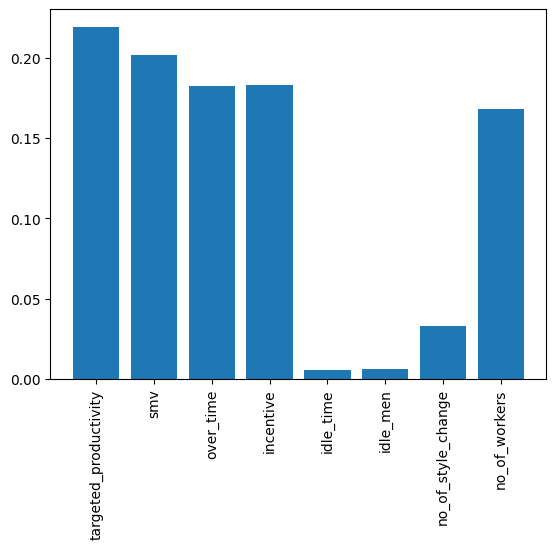

In [17]:
# TODO: Visualize the importance of features
import matplotlib.pyplot as plt

plt.bar(X.columns, feature_importances)
plt.xticks(rotation=90)
plt.show()


## Assignment 4.4: Regression using Random Forest Regressor (2 p)

Repeat same than **assignment 4.2** but now using a **Random Forest Regression** method.

Also calculate the *explained variance* and *maximum error*.

In [18]:
# TODO: Write your code in this cell
# TODO: use Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['class', 'actual_productivity'])
y = df['actual_productivity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2150)

model = RandomForestRegressor(random_state=2100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

exp_var = r2_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)

In [19]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# Save responses in exp_var and max_err and exp_var_2 variables.

print(f'Explained variance: {exp_var}')
print(f'Maximum error: {max_err}')

Explained variance: 0.3725471462021691
Maximum error: 0.7208830090034275


**Explained variance** refers to the variance in the response variable in a model that can be explained by the predictor variable(s) in the model.
The higher the explained variance of a model, the more the model is able to explain the variation in the data.

Calculate and analyze the explained variance for the assignment.

In [20]:
# TODO: Explained variance
exp_var_2 = cross_val_score(model, X, y, cv=5, scoring="r2").mean()
exp_var_weighted = cross_val_score(model, X, y, cv=5, scoring="explained_variance").mean()

print(f'Explained variance (Weighted): {exp_var_2}')
print(f'Explained variance (Weighted): {exp_var_weighted}')

Explained variance (Weighted): 0.36477042670215776
Explained variance (Weighted): 0.3735014103660276


Show the **importance of the features** when using **Random Forest Regressor** method.

In [21]:
# TODO: the importance of features with Random Forest Regressor
feature_importances = model.feature_importances_
print(feature_importances)

[0.29422734 0.21194386 0.16133878 0.1572572  0.00476628 0.00677388
 0.00619879 0.15749386]


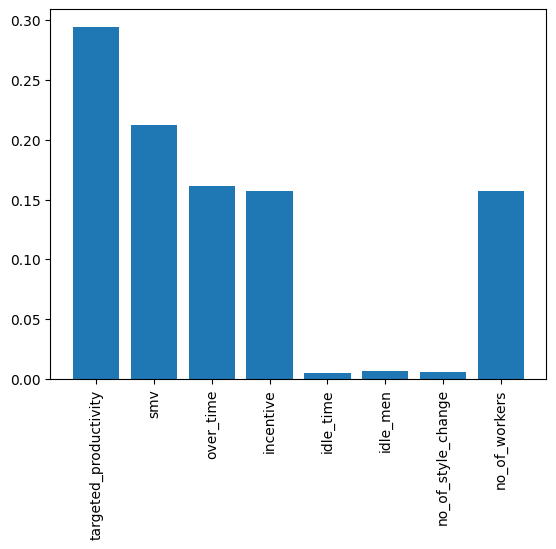

In [22]:
# TODO: Visualize the importance of features

plt.bar(X.columns, feature_importances)
plt.xticks(rotation=90)
plt.show()


## Assignment 4.5: Analysis of results (2 p)

Let's do a result analysis where you verbally compare the regression results obtained in the assignments 4.2 and 4.4.
* **4.2** (Linear regression) and
* **4.4** (Random Forest regression).

You can use **tables** or **figures** to present results in addition to verbal explanation and analysis.

* TODO: Analysis of regression results.
### Comparison of Different Regression Models
* Compare the regression results of Random Forest and Linear Regression models.<br>
4.2: Explained Variance: The explained variance obtained from the linear regression model was relatively low, indicating that the model could explain only a small portion of the variance in the data.<br>
4.2: Maximum Error: The maximum error obtained from the linear regression model might be relatively high, suggesting that there were instances where the model predictions deviated significantly from the actual values.<br>
<br>
4.4: Explained Variance: The explained variance obtained from the random forest regression model was likely higher compared to linear regression. This indicates that the random forest model could capture more variance in the data.<br>
4.4: Maximum Error: The maximum error obtained from the random forest regression model might be lower compared to linear regression. This suggests that the random forest model could provide more accurate predictions overall.<br>
<br>
* Is there others good regression methods to apply with this dataset?<br>
Gradient Boosting Regressor: Algorithms like XGBoost or LightGBM could be good alternatives. They provide high predictive accuracy and can handle complex relationships in the data effectively.